# Stock Data Analysis

This notebook analyzes stock market data using various machine learning models, providing insights into feature importance, correlations, and model performance.

## Load Modules and Data

In [1]:
from src.modules import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

2024-12-22 11:59:40.270547: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 11:59:40.279808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734897580.290709    5238 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734897580.293928    5238 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 11:59:40.304824: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Feature Importances Visualization

### Extract Feature Importances

In [2]:

def plot_feature_importances(model, feature_names, title):
    """
    Plots the feature importances for tree-based models.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.show()


### Feature Importances for XGBoost and RandomForest

I0000 00:00:1734897588.848014    5238 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14080 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1734897593.177197    6420 cuda_dnn.cc:529] Loaded cuDNN version 90300


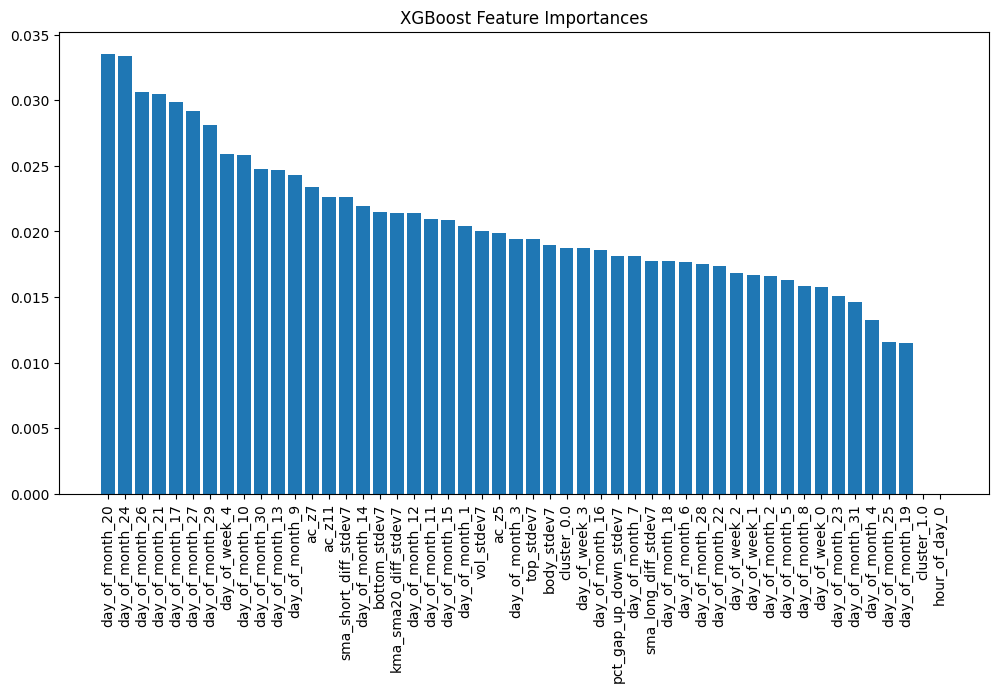

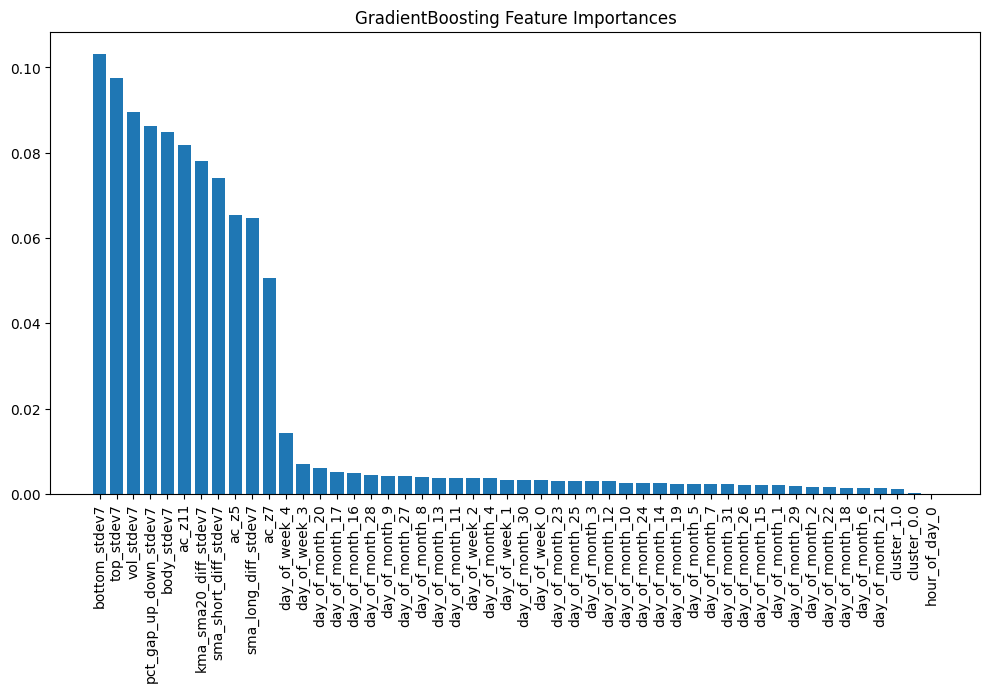

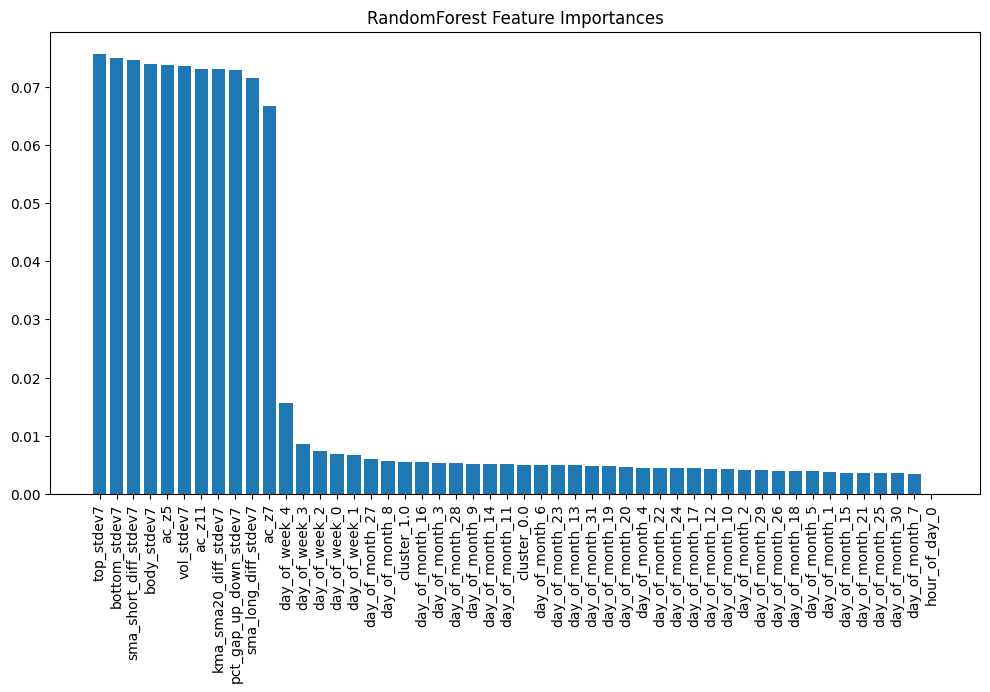

In [3]:

# Example usage
curr_prediction, models, feature_names, classification_reports = model('TSLA', '1d')

for model_name, fitted_model in models.items():
    if model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        plot_feature_importances(fitted_model, feature_names, f"{model_name} Feature Importances")


## Correlation Matrix

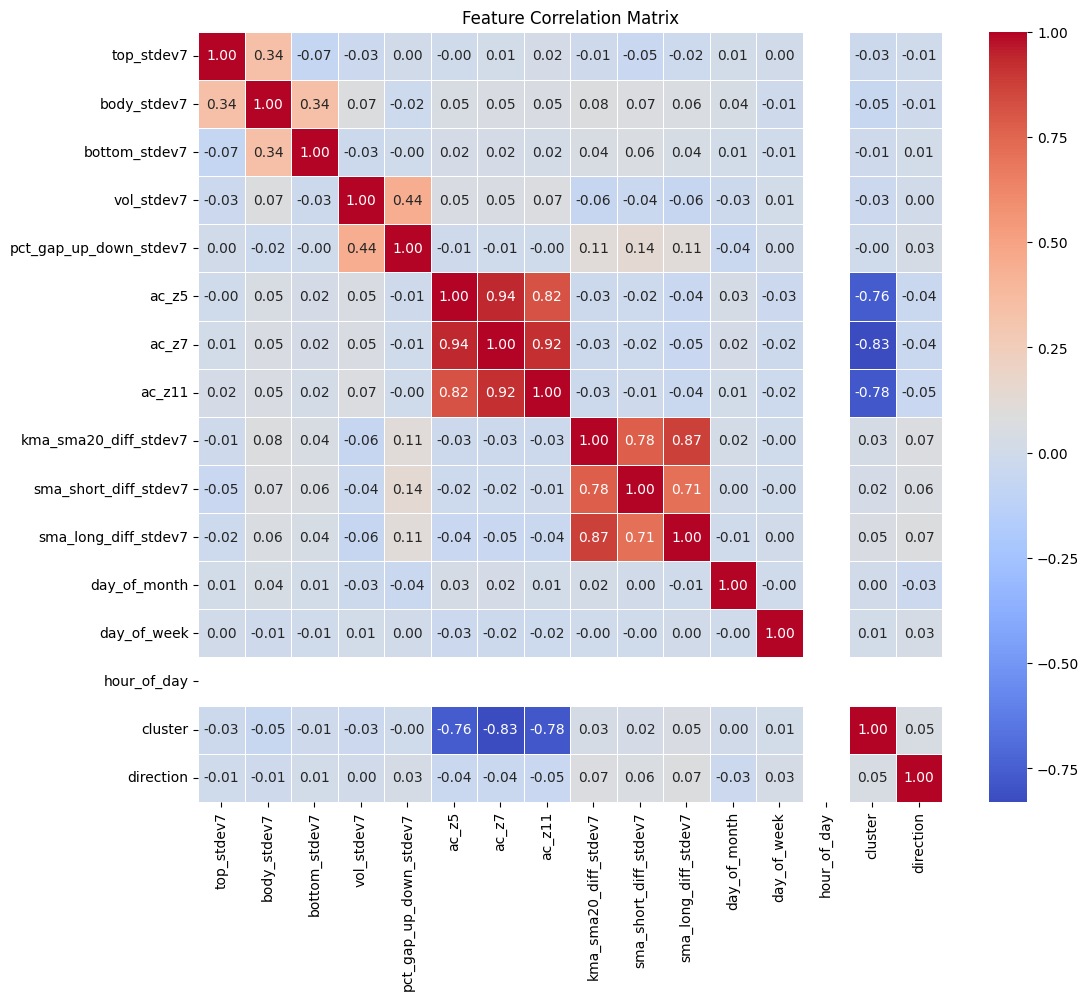

In [4]:

def plot_correlation_matrix(data, title):
    """
    Plots the correlation matrix heatmap.
    """
    corr = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Load transformed data
data = load_model_df('TSLA', '1d')
plot_correlation_matrix(data, "Feature Correlation Matrix")


## Model Performance Summary

In [5]:
# Generate summary table
summary_table = predictions('tsla')

TSLA 5m Interval Timestamp: 2024-12-22 15:00:22


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,down,static
kelly_1:2.5,0.196355,0.202778,0.2,0.153672,0.328
prob_up,0.428506,0.598791,0.398895,0.25,0.0
prob_static,0.241081,0.144078,0.265654,0.125,1.0
prob_down,0.330413,0.257131,0.335451,0.625,0.0
precision,0.425968,0.430556,0.428571,0.39548,0.52
recall,0.394515,0.392405,0.405063,0.295359,0.516736
f1,0.409639,0.410596,0.416486,0.338164,0.518363
support,"[474.0, 478.0, 474.0]","[474.0, 478.0, 474.0]","[474.0, 478.0, 474.0]","[474.0, 478.0, 474.0]","[474.0, 478.0, 474.0]"


TSLA 15m Interval Timestamp: 2024-12-22 15:01:10


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,static,static,static,static,static
kelly_1:2.5,0.349189,0.336842,0.33198,0.215741,0.273333
prob_up,0.238062,0.121056,0.268735,0.25,0.0
prob_static,0.559355,0.805649,0.442713,0.5,1.0
prob_down,0.202583,0.073294,0.288552,0.25,0.0
precision,0.535135,0.526316,0.522843,0.439815,0.480952
recall,0.622642,0.566038,0.647799,0.597484,0.63522
f1,0.575581,0.545455,0.578652,0.506667,0.547425
support,"[158.0, 159.0, 159.0]","[158.0, 159.0, 159.0]","[158.0, 159.0, 159.0]","[158.0, 159.0, 159.0]","[158.0, 159.0, 159.0]"


TSLA 1h Interval Timestamp: 2024-12-22 15:01:25


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,down,down,up,static
kelly_1:2.5,0.156506,0.167123,0.161337,0.068696,0.068932
prob_up,0.444387,0.293295,0.328379,0.75,0.0
prob_static,0.270454,0.246292,0.19826,0.0,1.0
prob_down,0.285159,0.460413,0.473361,0.25,0.0
precision,0.397504,0.405088,0.400955,0.334783,0.334951
recall,0.406934,0.377737,0.306569,0.281022,1.0
f1,0.402164,0.390935,0.347466,0.305556,0.501818
support,"[548.0, 552.0, 548.0]","[548.0, 552.0, 548.0]","[548.0, 552.0, 548.0]","[548.0, 552.0, 548.0]","[548.0, 552.0, 548.0]"


TSLA 1d Interval Timestamp: 2024-12-22 15:03:11


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,down,down,down,up,static
kelly_1:2.5,0.056388,0.082759,0.040609,0.118519,0.067956
prob_up,0.159949,0.126984,0.246712,0.5,0.0
prob_static,0.313583,0.230544,0.215593,0.25,1.0
prob_down,0.526468,0.642473,0.537695,0.25,0.0
precision,0.325991,0.344828,0.314721,0.37037,0.334254
recall,0.307054,0.33195,0.257261,0.373444,1.0
f1,0.316239,0.338266,0.283105,0.371901,0.501035
support,"[241.0, 242.0, 241.0]","[241.0, 242.0, 241.0]","[241.0, 242.0, 241.0]","[241.0, 242.0, 241.0]","[241.0, 242.0, 241.0]"


TSLA 1wk Interval Timestamp: 2024-12-22 15:03:50


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,down,down,down,up,down
kelly_1:2.5,0.088372,0.1,0.138462,0.154717,0.07619
prob_up,0.213893,0.102329,0.231424,0.375,0.0
prob_static,0.064094,0.041408,0.168821,0.25,0.0
prob_down,0.722013,0.856263,0.599755,0.375,1.0
precision,0.348837,0.357143,0.384615,0.396226,0.340136
recall,0.3,0.3,0.3,0.428571,1.0
f1,0.322581,0.326087,0.337079,0.411765,0.507614
support,"[49.0, 48.0, 50.0]","[49.0, 48.0, 50.0]","[49.0, 48.0, 50.0]","[49.0, 48.0, 50.0]","[49.0, 48.0, 50.0]"


TSLA 1mo Interval Timestamp: 2024-12-22 15:04:06


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,up,up
kelly_1:2.5,0.44,0.109091,0.3,-0.05,0.066667
prob_up,0.90895,0.998518,0.549902,0.375,1.0
prob_static,0.039017,0.000824,0.221069,0.25,0.0
prob_down,0.052034,0.000658,0.229029,0.375,0.0
precision,0.6,0.363636,0.5,0.25,0.333333
recall,0.6,0.4,0.6,0.3,1.0
f1,0.6,0.380952,0.545455,0.272727,0.5
support,"[10.0, 10.0, 10.0]","[10.0, 10.0, 10.0]","[10.0, 10.0, 10.0]","[10.0, 10.0, 10.0]","[10.0, 10.0, 10.0]"


### **Conclusions**

<br>  

1. **Gradient Boosting Shows Strong Performance Across Intervals**:  
   - Gradient Boosting consistently achieves higher precision, recall, and F1 scores compared to other models, particularly in shorter time intervals like 5 minutes and 15 minutes.  

<br>  

2. **LSTM Performance on Static Predictions**:  
   - The LSTM model predictions in most intervals achieves perfect recall (1.0), but its precision remains low, indicating potential over-prediction of the "static" class.  

<br>  

3. **Kelly Criterion Indicates Conservative Probabilities**:  
   - The Kelly Criterion values are generally low, indicating that the probabilities predicted by models are not confident enough to make aggressive bets across intervals.  

---

### **Next Steps**

<br>  

1. **Enhance LSTM Model Architecture**:  
    - Improve the LSTM model by:  
      - Incorporating more complex layers (e.g., Bidirectional LSTM).  
      - Reducing feature engineering, as stdev may weaken the learning rates of the LSTM model.  
      - Fine-tuning the hyperparameters such as batch size, learning rate, and dropout rate.  
      - Augmenting the dataset to balance predictions across "up," "static," and "down."  

<br>  

2. **Focus on Short-Term Intervals**:  
    - Given the stronger performance of models in shorter intervals (e.g., 5m and 15m), prioritize optimizing predictions in these intervals for actionable short-term trading strategies.  

<br>  

3. **Evaluate and Adjust Thresholds**:  
    - Adjust classification thresholds for models, particularly the LSTM and Gradient Boosting models, to improve precision without overly sacrificing recall. This can balance the trade-offs between false positives and false negatives.  

<br>  

4. **Use Profit and/or LSTM Regression Models to Predict Price**:  
    - Add regression models to see if classifier movement predictions mirror those of the regressor models.  
    - Project out in longer time intervals to spot trends.  
